# Initial leg (Earth -> first Asteroid) simulation

In [38]:
import numpy as np
from numpy.linalg import norm
import scipy as sp
import pandas as pd
import scipy.optimize as opt
import random

import logging

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

from asteroid import Asteroid
from lambert_izzo import lambert as lambert_izzo
from lambert import lambert as lambert_bate

from satellite import Satellite

In [2]:
df = pd.read_csv('../gtoc4_problem_data.txt', skiprows=2,delimiter= '\s+',header=None)
df.columns = ['Name','Epoch','a','e','i','LAN','omega','M0']
df.head()

,Name,Epoch,a,e,i,LAN,omega,M0
0,'1580',54800.0,2.196803,0.487683,52.090794,62.324795,159.539839,3.521687
1,'1620',54800.0,1.245551,0.335511,13.337693,337.266017,276.806539,136.950031
2,'1943',54800.0,1.430317,0.255816,8.704065,246.401915,338.253875,288.405238
3,'2061',54800.0,2.264953,0.537119,3.770822,207.654108,156.432028,46.995497
4,'2135',54800.0,1.599572,0.503268,23.054312,191.262849,290.838892,256.724981


In [3]:
# load all asteroids into a list 
asteroids = [None,]*len(df)

# create asteroids
for i in range(len(df)):
    asteroids[i] = Asteroid(*tuple(df.loc[i].values))

In [4]:
print(asteroids[1008].details())

*Asteroid '2006HY50'*
  Epoch0 (MJD)  : 54800.0
  a (AU)        : 2.58527077384406
  e_mag         : 0.6283443417071826
  i (deg)       : 25.68377607051675
  LAN (deg)     : 44.67871108526802
  argPeri (deg) : 77.67636454937323
  meanAnom (deg): 243.55517571104423


In [5]:
earth = Asteroid('Earth',54000,0.999988049532578, 1.671681163160e-2, 0.8854353079654e-3, 175.40647696473, 287.61577546182, 257.60683707535)
print(earth.details())

*Asteroid Earth*
  Epoch0 (MJD)  : 54000
  a (AU)        : 0.9999880495325779
  e_mag         : 0.0167168116316
  i (deg)       : 0.0008854353079653999
  LAN (deg)     : 175.40647696473
  argPeri (deg) : 287.61577546182
  meanAnom (deg): 257.60683707535


In [37]:
earth.get_rv(epoch=ld)

(array([ 2.15980138e+07, -1.50546116e+08,  2.29230046e+03]),
 array([ 2.90019605e+01,  4.11814566e+00, -9.93302261e-05]))

In [40]:
sat = Satellite()

In [41]:
sat.set_state(ld, *earth.get_rv(epoch=ld))

In [43]:
print(sat.details())

*Spacecraft Scaramouche*
  Epoch0 (MJD)  : 58676.4
  a (AU)        : 0.9999880495325774
  e_mag         : 0.016716811631600034
  i (deg)       : 0.0008854353079653586
  LAN (deg)     : 175.40647696473007
  argPeri (deg) : 287.6157754618187
  meanAnom (deg): 174.97766928008392


In [44]:
sat.get_rv(ld)

(array([ 6.00155199e+07, -1.39710715e+08,  2.07784380e+03]),
 array([ 2.68853711e+01,  1.16453524e+01, -2.12660682e-04]))

In [6]:
earth.get_r(epoch=54000)

array([-1.05175505e+08,  1.03376966e+08, -1.46226274e+03])

In [7]:
# for each launch
launch_step = 10
earliest_launch_date = 57023
latest_launch_date = 61041+10
earliest_launch_date = 58500
latest_launch_date = 59000


launch_dates = np.arange(earliest_launch_date, latest_launch_date, step=launch_step)

In [8]:
launch_dates

array([58500, 58510, 58520, 58530, 58540, 58550, 58560, 58570, 58580,
       58590, 58600, 58610, 58620, 58630, 58640, 58650, 58660, 58670,
       58680, 58690, 58700, 58710, 58720, 58730, 58740, 58750, 58760,
       58770, 58780, 58790, 58800, 58810, 58820, 58830, 58840, 58850,
       58860, 58870, 58880, 58890, 58900, 58910, 58920, 58930, 58940,
       58950, 58960, 58970, 58980, 58990])

In [9]:
len(launch_dates)

50

In [10]:
tof_vals = np.arange(20,64,step=5)

In [11]:
tof_vals

array([20, 25, 30, 35, 40, 45, 50, 55, 60])

In [12]:

import spiceypy as spice

ModuleNotFoundError: No module named 'spiceypy'

In [ ]:
logging.basicConfig(level=logging.INFO)

# debug, info, warn error critical

ld = launch_dates[0]
tof = tof_vals[5]
ast = asteroids[0]


r1 = earth.get_r(epoch=ld)
r2 = ast.get_r(epoch=ld+tof)

u_day = 86400 #seconds

mu = 1.32712440018e+11

v1, v2 = lambert_izzo(mu, r1, r2,tof=tof*u_day,M=0, return_='short')

vinf = norm(v1-earth.get_v(epoch=ld))


In [19]:
logging.basicConfig(level=logging.INFO)

# debug, info, warn error critical

ld = 58676.40
tof = 58731.65-ld
ast = asteroids[1057]

print(ast.details())


r1 = np.array([8.88099826e+04, -1.51900741e+08,  7.67777168e+06])#earth.get_r(epoch=ld)
r2 = np.array([-5.194324e+06,-5.215249e+05,1.465447e+08])#ast.get_r(epoch=ld+tof)

print(r2)

u_day = 86400 #seconds

mu = 1.32712440018e+11

v1, v2 = lambert_izzo(mu, r1, r2, tof=tof*u_day, M=0, return_='short')

print("******")


print(norm(v1))
print(norm(v2))
print(norm(earth.get_v(epoch=ld)))
print(v1-earth.get_v(epoch=ld))

vinf = norm(v1-earth.get_v(epoch=ld))

print(norm(vinf))

print("******")

v1, v2 = lambert_bate(mu, r1, r2, tof=tof*u_day, grade='pro')


print(norm(v1))
print(norm(v2))
print(norm(earth.get_v(epoch=ld)))
print(v1-earth.get_v(epoch=ld))

vinf = norm(v1-earth.get_v(epoch=ld))

print(norm(vinf))

INFO:root:========================= LAMBERT'S PROBLEM =========================
INFO:root:Transfering from r1: [ 8.88099826e+04 -1.51900741e+08  7.67777168e+06] [km]
INFO:root:              to r2: [-5.194324e+06 -5.215249e+05  1.465447e+08] [km]
INFO:root:  in time of flight: 55.25 [days]
INFO:root:=====================================================================
INFO:root:dtheta: 273.0943042486311
INFO:root:Transfer trajectory is a hyperbolla; z = -4.953823527875737
INFO:root:=========================== SOLUTION ===========================
INFO:root:Velocity at r1: [  0.45130012  47.20540456 -15.89368466] [km/s]
INFO:root:velocity at r2: [ -1.68221302 -14.17363454  48.39819387] [km/s]
INFO:root:================================================================


*Asteroid '2006QV89'*
  Epoch0 (MJD)  : 54800.0
  a (AU)        : 1.19172698984184
  e_mag         : 0.2243140875310219
  i (deg)       : 1.0697676665227522
  LAN (deg)     : 166.12046966888747
  argPeri (deg) : 236.63764002189566
  meanAnom (deg): 219.75410172645084
[-5.194324e+06 -5.215249e+05  1.465447e+08]
******
49.81127486532781
50.45896280235327
29.292880306707804
[-28.55066038  43.0872589  -15.89358533]
54.07641022002988
******
49.81127486532776
50.458962802353234
29.292880306707804
[-28.55066038  43.0872589  -15.89358533]
54.07641022002983


In [35]:
norm([r2[0], r2[1]])/1.5e8

0.034802930935512386

In [36]:
norm([r1[0], r1[1]])/1.5e8

1.0126717797448728

In [ ]:
tof

In [31]:
r1, r2

(array([ 8.88099826e+04, -1.51900741e+08,  7.67777168e+06]),
 array([-5.194324e+06, -5.215249e+05,  1.465447e+08]))

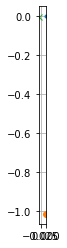

In [32]:
plt.plot(0, 0,'.')
plt.plot(r1[0]/1.5e8, r1[1]/1.5e8,'o')
plt.plot(r2[0]/1.5e8, r2[1]/1.5e8,'x')
plt.grid()
ax = plt.gca()
ax.set_aspect('equal','box')

In [ ]:
vinf

In [ ]:
u_day = 86400 #seconds
mu = 1.32712440018e+11

vinf_max = 4.1
    
ind = 0
for ld in launch_dates:
    for tof in tof_vals:
        for ast in asteroids:

            r1 = earth.get_r(epoch=ld)
            r2 = ast.get_r(epoch=ld+tof)
            try:
                v1, v2 = lambert(mu, r1, r2,tof=tof*u_day,M=0, return_='short')
            except:
                continue
            vinf = norm(v1-earth.get_v(epoch=ld))
            
            if vinf<vinf_max:
                
                print(f'{ind}: date: {ld}, tof: {tof}, ast: {ast}, vinf: {vinf}')
                ind += 1

